# Practice Exercise: Scikit-Learn 1
## Basic Modeling

### Objectives

In line with the [SK1 Tutorial](https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-1-basic-modeling/), the objective of this practice notebook is to familiarize you with working with a regression problem using a `holdout` approach. The dataset under consideration is the `diamonds` dataset that comes with the `ggplot2` library in R.

The `diamonds` dataset contains information on diamonds including carat (numeric), clarity (categorical), cut (categorical), and color (categorical). The dataset has 10 features and 53940 instances. The objective is to predict the price of a diamond in USD given its attributes. 

### Exercise 0: Data Preparation

Prepare the dataset for predictive modeling as follows:

0. Refer to our data prep practice solutions on Canvas as well as our data prep script on GitHub [here](https://github.com/akmand/datasets/blob/master/prepare_dataset_for_modeling.py) for some inspiration on preparing this data for predictive modeling.
1. Set `pd.set_option('display.max_columns', None)`. Read in the raw data `diamonds.csv` on GitHub [here](https://github.com/akmand/datasets). Have a look at the shape and data types of the features. Also have a look at the top 5 rows.
2. Generate descriptive statistics for categorical and numerical features separately.
3. Have a look at the unique values for each categorical feature and check whether everything is OK in the sense that there are no unusual values.
4. Make sure there are no missing values anywhere.
5. Separate the last column from the dataset and set it to "target". Make sure "target" is a `Pandas` series at this point, and not a `NumPy` array (which will be necessary for the sampling below). Set all the other columns to be the "Data" data frame, which will be the set of descriptive features.
6. Make sure all categorical descriptive features are encoded via one-hot-encoding. In this particular dataset, some categorical descriptive features are actually ordinal, but we will go ahead and encode them via one-hot-encoding for simplicity.
7. Make sure all descriptive features are scaled via min-max scaling and the output is a `Pandas` data frame with correct column names. Do **NOT** scale the target feature!
8. Finally have a look at the top 5 rows of "target" and "Data" respectively.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

# so that we can see all the columns
pd.set_option('display.max_columns', None) 

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/diamonds.csv'
url_content = requests.get(df_url, verify=False).content
df = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

# df = pd.read_csv('diamonds.csv')

print(df.shape)
df.head()

(53940, 10)


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [2]:
# Save the datafile
df.to_csv('diamonds.csv', index=False)

In [3]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [4]:
df.describe(include=np.number).round(3)

,carat,depth,table,x,y,z,price
count,53940.000,53940.000,53940.000,53940.000,53940.000,53940.000,53940.00
mean,0.798,61.749,57.457,5.731,5.735,3.539,3932.80
std,0.474,1.433,2.234,1.122,1.142,0.706,3989.44
min,0.200,43.000,43.000,0.000,0.000,0.000,326.00
25%,0.400,61.000,56.000,4.710,4.720,2.910,950.00
50%,0.700,61.800,57.000,5.700,5.710,3.530,2401.00
75%,1.040,62.500,59.000,6.540,6.540,4.040,5324.25
max,5.010,79.000,95.000,10.740,58.900,31.800,18823.00


In [5]:
df.describe(include=np.object).round(3)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [6]:
# Let's ensure the categorical features look OK

# get the list of categorical descriptive features
categorical_cols = df.columns[df.dtypes==object].tolist()

for categorical_col in categorical_cols:
    print('Column ' + categorical_col + ':')
    print(df[categorical_col].value_counts(), '\n')

Column cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

Column color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

Column clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



In [7]:
# Let's make sure there are no missing values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
###############################
#### Data Preparation
###############################

from sklearn import preprocessing

# last column is target feature
target = df.iloc[:, -1]

# everything else is Data, i.e., the set of descriptive features
Data = df.iloc[:, :-1]

# if a nominal feature has only 2 levels:
# encode it as a single binary variable
for col in categorical_cols:
    n = len(Data[col].unique())
    if n == 2:
        Data[col] = pd.get_dummies(Data[col], drop_first=True)

# for categorical features with >2 levels: use one-hot-encoding
Data = pd.get_dummies(Data)
Data_cols = Data.columns

# scale Data between 0 and 1
# set the output to a data frame with correct column names
Data = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(Data), 
                    columns=Data_cols)

In [9]:
Data.shape

(53940, 26)

In [10]:
Data.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.367784,0.067572,0.076415,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.362197,0.065195,0.072642,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.377095,0.069100,0.072642,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.391061,0.071817,0.082704,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.563889,0.288462,0.404097,0.073854,0.086478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [11]:
target.shape

(53940,)

In [12]:
target.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

### Exercise 1: Modeling Preparation

- Randomly sample 5000 rows as it's too big for a short demo (using a random seed of 999). Make sure to run `reset_index(drop=True)` on the sampled data to reset the indices.
> - **NOTE:** It's **extremely** important to use the same seed for both Data and target while sampling, otherwise you will happily mix and match different rows without getting any execution errors and all you results will be garbage.
- Split the sampled data as 70% training set and the remaining 30% test set using a random seed of 999. 

In [13]:
Data_sample = Data.sample(n=5000, random_state=999).reset_index(drop=True)
Data_sample.shape

(5000, 26)

In [14]:
target_sample = target.sample(n=5000, random_state=999).reset_index(drop=True)
target_sample.shape

(5000,)

In [15]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train, t_test = train_test_split(Data_sample.values, 
                                                    target_sample.values, 
                                                    test_size=0.3, 
                                                    random_state=999)

In [16]:
print(D_train.shape)
print(D_test.shape)
print(t_train.shape)
print(t_test.shape)

(3500, 26)
(1500, 26)
(3500,)
(1500,)


### Exercise 2

- Fit a nearest neighbor (NN) regressor with $k=3$ neighbors using the Euclidean distance. 
- Fit the model on the train data and evaluate its $R^2$ (the default "score()" for regressors) performance on the test data. 

In [17]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3, p=2)
knn_regressor.fit(D_train, t_train)

score_knn = knn_regressor.score(D_test, t_test)

print(f'score_knn: {score_knn:.2f}')

score_knn: 0.83


### Exercise 3

- Extend Question 2 by fitting $k=1,\ldots,10$ neighbors using the Manhattan and Euclidean distances respectively.
- What is the optimal $k$ value for each distance metric? That is, at which $k$, the NN regressor returns the highest $R^2$ score?
- Which distance metric seems to be better? 

In [18]:
k_list = list(np.arange(1, 11))

knn_score_manhattan = []
knn_score_euclidean = []

for k in k_list:
    knn_regressor_manhattan = KNeighborsRegressor(n_neighbors=k, p=1)
    knn_regressor_manhattan.fit(D_train, t_train)
    knn_score_manhattan = knn_score_manhattan + [knn_regressor_manhattan.score(D_test, t_test)]
    
    knn_regressor_euclidean = KNeighborsRegressor(n_neighbors=k, p=2)
    knn_regressor_euclidean.fit(D_train, t_train)
    knn_score_euclidean = knn_score_euclidean + [knn_regressor_euclidean.score(D_test, t_test)]

In [19]:
results = pd.DataFrame({'score_manhattan': knn_score_manhattan, 
                        'score_euclidean': knn_score_euclidean},
                      index = k_list)
results

,score_manhattan,score_euclidean
1,0.835761,0.834437
2,0.840516,0.834388
3,0.830256,0.827770
4,0.809021,0.805942
5,0.784022,0.781398
6,0.750180,0.751187
7,0.725849,0.727718
8,0.706174,0.705348
9,0.690405,0.690273
10,0.676477,0.675774


### Exercise 4

- Fit a decision tree regressor with default values on the train data, and then evaluate its performance on the test data. 
- Does it perform better than the best KNN model from the previous question?

In [20]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor() # max_depth=5)
dt_regressor.fit(D_train, t_train)
dt_regressor.score(D_test, t_test)

0.9396118485899194

### Exercise 5

- Fit a simple linear regression model on train data, and then evaluate its performance on the test data. **Hint:** Use `LinearRegression()` in `sklearn.linear_model`. 
- How does it compare to the previous models?

In [21]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(D_train, t_train)
linear_regressor.score(D_test, t_test)

0.932819521243904

### Exercise 6

- Fit a random forest regressor with `n_estimators=100` on train data, and then evaluate its performance on the test data. 
- How does it compare to the previous models?

In [22]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(D_train, t_train)
rf_regressor.score(D_test, t_test)

0.9677991176076162

### Exercise 7

- Predict the first 5 observations of the **test** data using the linear regression model you built earlier. 
- Display your results as a data frame with three columns: 'target', 'prediction', 'absolute_diff'.
- How do the predictions look?

In [23]:
new_obs = D_test[0:5]

preds = linear_regressor.predict(new_obs)

results = pd.DataFrame({'target': t_test[0:5], 
                        'prediction':preds})

results['absolute_diff'] = np.abs(results['target'] - results['prediction'])
results.round()

,target,prediction,absolute_diff
0,2919,3984.0,1065.0
1,912,1024.0,112.0
2,2365,2000.0,365.0
3,11666,10448.0,1218.0
4,1881,2192.0,311.0


**Further exposition**

Let's create histograms to visualize the difference between predicted values from the linear regression and target values on both training and test sets. How are the difference values distributed? Are they centered around zero? What are minimum and maximum difference values for training and test sets?

(array([1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 2.000e+00, 9.000e+00, 2.000e+00, 2.000e+01, 2.800e+01,
        3.100e+01, 5.600e+01, 1.220e+02, 2.440e+02, 5.590e+02, 1.008e+03,
        1.038e+03, 2.660e+02, 5.500e+01, 2.600e+01, 1.200e+01, 5.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([-10151.        ,  -9569.43333333,  -8987.86666667,  -8406.3       ,
         -7824.73333333,  -7243.16666667,  -6661.6       ,  -6080.03333333,
         -5498.46666667,  -4916.9       ,  -4335.33333333,  -3753.76666667,
         -3172.2       ,  -2590.63333333,  -2009.06666667,  -1427.5       ,
          -845.93333333,   -264.36666667,    317.2       ,    898.76666667,
          1480.33333333,   2061.9       ,   2643.46666667,   3225.03333333,
          3806.6       ,   4388.16666667,   4969.73333333,   5551.3       ,
          6132.86666667,   6714.43333333,   7296.        ]),
 <BarContainer object of 30 artists

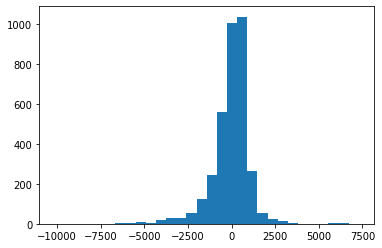

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pred_train = linear_regressor.predict(D_train)
pred_test = linear_regressor.predict(D_test)
diff_train = pred_train - t_train
diff_test = pred_test - t_test
plt.hist(diff_train, bins=30)  

(array([  2.,   3.,   0.,   3.,   3.,   5.,   8.,  16.,   7.,  21.,  33.,
         65., 118., 186., 274., 362., 267.,  70.,  26.,  12.,   6.,   5.,
          3.,   1.,   2.,   0.,   1.,   0.,   0.,   1.]),
 array([-6025. , -5615.3, -5205.6, -4795.9, -4386.2, -3976.5, -3566.8,
        -3157.1, -2747.4, -2337.7, -1928. , -1518.3, -1108.6,  -698.9,
         -289.2,   120.5,   530.2,   939.9,  1349.6,  1759.3,  2169. ,
         2578.7,  2988.4,  3398.1,  3807.8,  4217.5,  4627.2,  5036.9,
         5446.6,  5856.3,  6266. ]),
 <BarContainer object of 30 artists>)

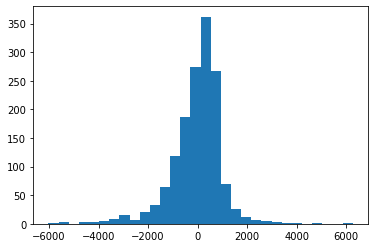

In [25]:
plt.hist(diff_test, bins=30) 

### Optional: Exercise 8

This question requires basic knowledge of linear regression:
- Compute the previous predictions directly *without* using the `fit()` function. 

**Background:** Using the textbook notation, a linear regression model is defined as:

$$\mathbb{M}_w(d) = w[0] + \sum_{j=1}^{p} w[j] \times d[j]$$

where 
- $d$ is a vector of descriptive features, 
- $w[0]$ is the intercept, and
- $w[1], w[2],\ldots,w[p]$ are the regression weights corresponding to these features. 

Here, the target feature (the price of a diamond) can be modeled as a weighted linear combination of descriptive features. We shall not cover linear regression in depth. If you are interested, please refer to Sections 7.2 and 7.3 in the textbook for more details.

**Hint:** 
1. Use the `coef_` attribute of the `linear_regressor` object to get the regression coefficients. 
2. Multiply `new_obs` with the regression coefficients, perform sum along `axis=1`.
3. Use the `intercept_` attribute to get the constant term in the linear regression and add it to the above sum. 
4. Confirm that your results are the same as in the previous question.

In [26]:
new_obs

array([[0.11018711, 0.525     , 0.23076923, 0.54283054, 0.09796265,
        0.11289308, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.04158004, 0.55277778, 0.23076923, 0.43947858, 0.0803056 ,
        0.09339623, 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.10602911, 0.53055556, 0.21153846, 0.53351955, 0.09779287,
        0.11226415, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

The estimated coefficients, $w[1], w[2],\ldots,w[p]$ are:

In [27]:
linear_regressor.coef_

array([ 5.62713641e+04, -3.84344959e+03, -1.07780514e+03, -2.68180581e+04,
        6.92668194e+04,  7.06994152e+03,  1.57685018e+15,  1.57685018e+15,
        1.57685018e+15,  1.57685018e+15,  1.57685018e+15,  9.11813122e+16,
        9.11813122e+16,  9.11813122e+16,  9.11813122e+16,  9.11813122e+16,
        9.11813122e+16,  9.11813122e+16,  3.92453087e+15,  3.92453087e+15,
        3.92453087e+15,  3.92453087e+15,  3.92453087e+15,  3.92453087e+15,
        3.92453087e+15,  3.92453087e+15])

The estimated $w[0]$ is:

In [28]:
linear_regressor.intercept_

-9.668269325146181e+16

In [29]:
predictions = (new_obs*linear_regressor.coef_).sum(axis=1) + linear_regressor.intercept_
predictions.round()

array([ 3984.,  1040.,  2000., 10464.,  2192.])

## Optional: Regression Diagnostics

Relying on $R^{2}$ to evaluate regressor performance is not sufficient. Sometimes, we need to ensure if the regressors generate reasonable predictions. In this case, we have to check if the predicted diamond prices are positive (a negative price would imply you would get the diamond free and some extra cash!) 

Let's predict on training set for each model developed in the previous exercises. Create a dataframe, named `pred_result`, which consists of four columns corresponding to their predictions. Then, run `pred_result.describe()` to check if any model has a negative minimum value. Does the result surprise you? Will you get a similar result if you predict on test set?


In [30]:
# We need to fit the optimal KNN based on the result in Exercise 3
KNN_optimal = KNeighborsRegressor(n_neighbors=2, p=1)
KNN_optimal.fit(D_train, t_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [31]:
pred_knn_train = KNN_optimal.predict(D_train)
pred_rf_train = rf_regressor.predict(D_train)
pred_lr_train = linear_regressor.predict(D_train)
pred_dt_train = dt_regressor.predict(D_train)

pred_results = pd.DataFrame({"KNN": pred_knn_train,
                             "RandomForest":  pred_rf_train,
                             "LinearRegression": pred_lr_train,
                             "DecisionTree": pred_dt_train})
pred_results.describe()

,KNN,RandomForest,LinearRegression,DecisionTree
count,3500.000000,3500.000000,3500.000000,3500.000000
mean,3984.761857,4029.166854,4001.124571,4022.388000
std,3915.514521,4007.163153,3895.910534,4058.232226
min,375.500000,393.270000,-3408.000000,342.000000
25%,963.000000,947.600000,1040.000000,953.500000
50%,2531.750000,2538.885000,2848.000000,2490.500000
75%,5432.625000,5458.470000,6000.000000,5438.000000
max,18614.000000,18055.260000,20960.000000,18781.000000


***
www.featureranking.com